# Denosing the Autoencoder

In [ ]:
# import the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist

In [ ]:
# load the dataset
(X_train ,_),(X_test , _) = mnist.load_data()

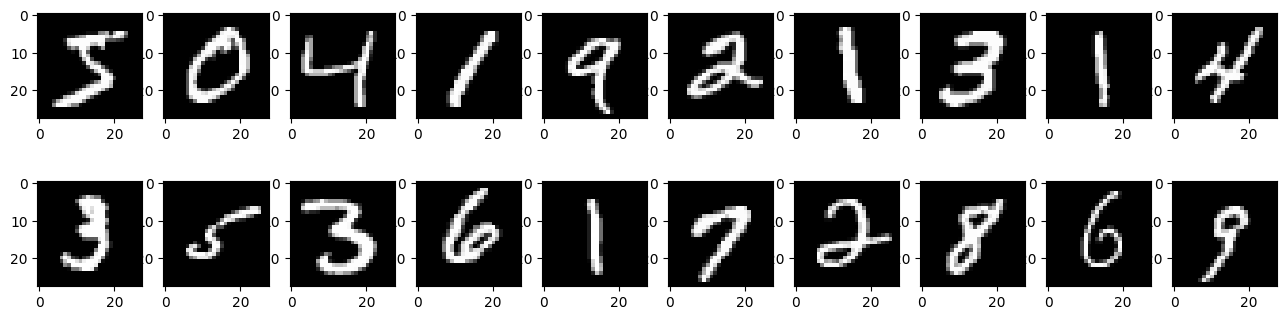

In [ ]:
# display the images
fig, axes = plt.subplots(2, 10, figsize = (16 ,4))

count = 0

for i in range(2):
  for j in range(10):
    axes[i, j].imshow(X_train[count], cmap='gray')
    count+=1


In [ ]:
# Normalizae the data

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train.max()


1.0

In [ ]:
# Adding the noise the training data
import numpy as np
noise_factor = 0.2

X_train_noise = X_train  + noise_factor * np.random.normal(loc = 0. , scale = 1., size = X_train.shape )

X_test_noise = X_test + noise_factor * np.random.normal(loc = 0., scale = 1.,  size = X_test.shape)

In [ ]:
X_train_noise.shape, X_test_noise.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

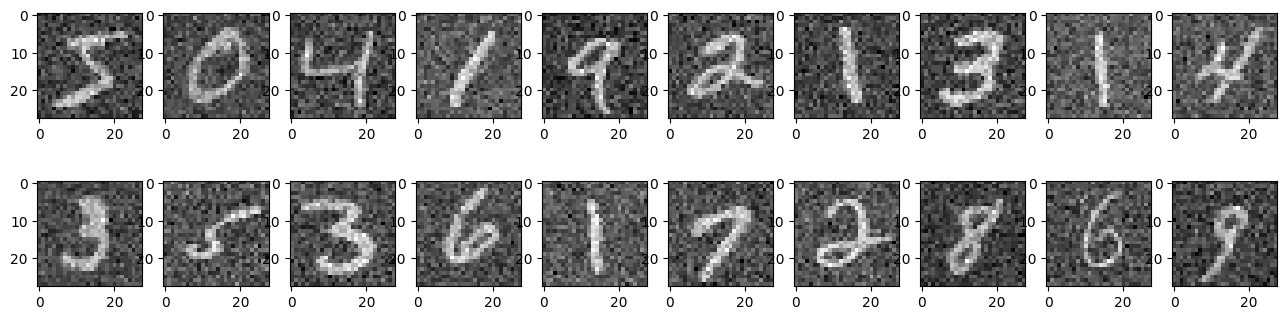

In [ ]:
# Visualize the noisy data

fig, axes = plt.subplots(2, 10, figsize = (16, 4))

count = 0
for i in range(2):
  for j in range(10):
    axes[i, j].imshow(X_train_noise[count], cmap = 'gray')
    count+=1

In [ ]:
# Reshaping the dataset

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train_noise = X_train_noise.reshape(X_train_noise.shape[0], 28, 28, 1)
X_test_noise = X_test_noise.reshape(X_test_noise.shape[0], 28, 28, 1)

X_train_noise.shape, X_test_noise.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, UpSampling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint

import tensorflow as tf



In [ ]:
# encoder
encoder_input = Input(shape = X_train.shape[1:])
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(encoder_input)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size = (2,2), padding = 'same')(x)
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
encoded = MaxPool2D(pool_size = (2,2), padding = 'same')(x)


In [ ]:
# decoder
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(encoded)
x = BatchNormalization()(x)
x = UpSampling2D()(x)
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = UpSampling2D()(x)
decoded = Conv2D(1, (3,3), activation = 'sigmoid', padding = 'same')(x)

In [ ]:
autoencoder = Model(encoder_input, decoded, name = 'denoising_model')
autoencoder.summary()


Model: "denoising_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 14, 14, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 7, 7, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 7, 7, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 14, 14, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_3 (UpSampling2D)       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,865 (112.75 KB)

 Trainable params: 28,609 (111.75 KB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
history = autoencoder.fit(
    X_train_noise,
    X_train,
    batch_size=128,
    epochs=50,
    validation_split=0.25,
    verbose=2
)

Epoch 1/50
352/352 - 11s - 30ms/step - loss: 0.1749 - val_loss: 0.1151
Epoch 2/50
352/352 - 5s - 14ms/step - loss: 0.0812 - val_loss: 0.0811
Epoch 3/50
352/352 - 2s - 7ms/step - loss: 0.0778 - val_loss: 0.0777
Epoch 4/50
352/352 - 2s - 6ms/step - loss: 0.0763 - val_loss: 0.0781
Epoch 5/50
352/352 - 3s - 7ms/step - loss: 0.0754 - val_loss: 0.0772
Epoch 6/50
352/352 - 3s - 8ms/step - loss: 0.0746 - val_loss: 0.0750
Epoch 7/50
352/352 - 2s - 6ms/step - loss: 0.0742 - val_loss: 0.0745
Epoch 8/50
352/352 - 2s - 7ms/step - loss: 0.0739 - val_loss: 0.0743
Epoch 9/50
352/352 - 2s - 6ms/step - loss: 0.0734 - val_loss: 0.0740
Epoch 10/50
352/352 - 2s - 6ms/step - loss: 0.0732 - val_loss: 0.0746
Epoch 11/50
352/352 - 2s - 6ms/step - loss: 0.0730 - val_loss: 0.0749
Epoch 12/50
352/352 - 3s - 8ms/step - loss: 0.0727 - val_loss: 0.0734
Epoch 13/50
352/352 - 2s - 6ms/step - loss: 0.0726 - val_loss: 0.0737
Epoch 14/50
352/352 - 2s - 7ms/step - loss: 0.0724 - val_loss: 0.0729
Epoch 15/50
352/352 - 2s -

In [ ]:
def visualize_data(data, row, column):
    data = data.reshape(data.shape[0], 28,28)
    count = 0
    fig, axes = plt.subplots(row, column, figsize = (16,4))
    for i in range(row):
        for j in range(column):
            axes[i,j].imshow(data[count], cmap = 'gray')
            count+=1

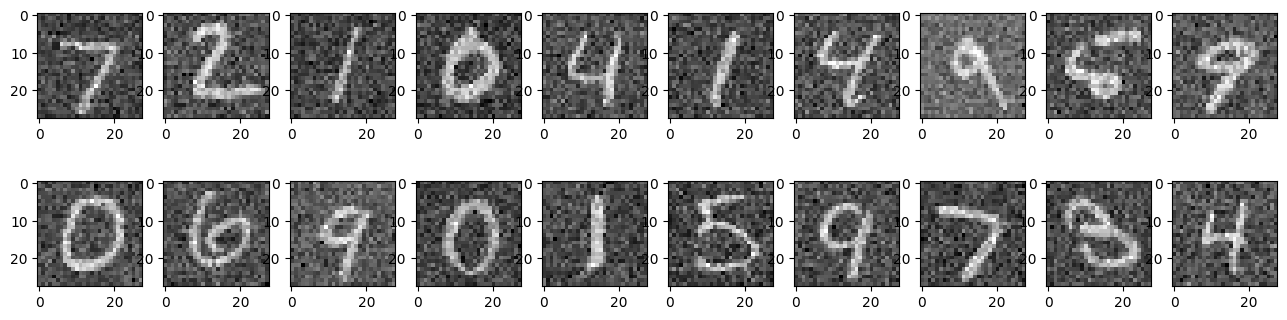

In [ ]:
visualize_data(X_test_noise[:20], 2,10)

In [ ]:
pred = autoencoder.predict(X_test_noise[:20])
pred.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


(20, 28, 28, 1)

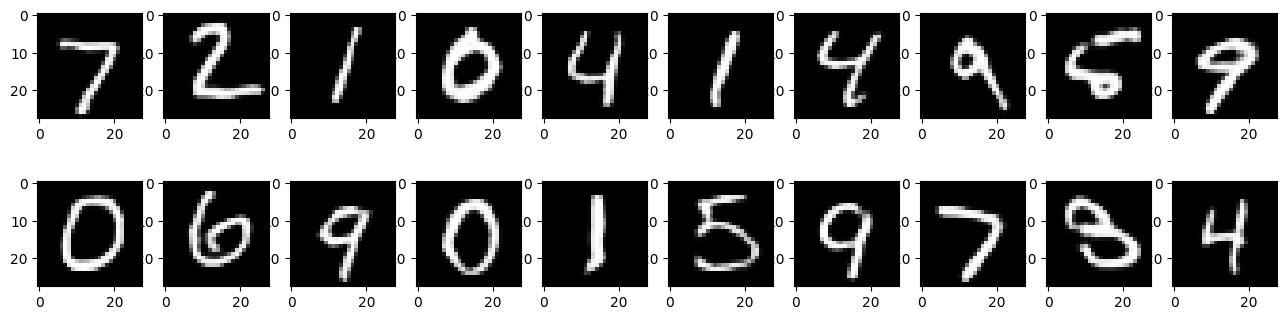

In [ ]:
visualize_data(pred, 2, 10)